- MNIST stands for Modified National Institute of Standards and Technology.
- It is a dataset that contains 70,000 images of handwritten digits (0 through 9).


In [12]:
import torch
import torchvision  # Library to handle datasets
import torchvision.transforms as transforms  # To process images
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

##Build a Simple Neural Network Model

In [13]:
# Step 1: Build model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleNN()

# Step 2: Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Step 3: Training loop
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")


Epoch 1/5, Loss: 1.185567701737086
Epoch 2/5, Loss: 0.4235449325243632
Epoch 3/5, Loss: 0.34735536899169284
Epoch 4/5, Loss: 0.31292030855019887
Epoch 5/5, Loss: 0.288748439848423


##Download MNIST dataset

In [14]:
# Transform: convert image to tensor and normalize between 0 and 1
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Center images around 0
])

# Download and load training data
train_dataset = torchvision.datasets.MNIST(
    root='./data',     # Folder to save data
    train=True,        # Training set
    transform=transform,  # Apply transforms
    download=True      # Download if not exists
)

# Download and load testing data
test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,       # Test set
    transform=transform,
    download=True
)

##Create Data Loaders

- DataLoader	--> Helps to fetch data in mini-batches automatically.	Faster training.
- batch_size=64	--> Process 64 images at a time.	Improves efficiency.

In [15]:
from torch.utils.data import DataLoader

# DataLoader helps load data in mini-batches
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


##Validation Set During Training

## 1. Split the Train Dataset

In [16]:
# Total size of training dataset
train_size = int(0.8 * len(train_dataset))  # 80%
val_size = len(train_dataset) - train_size  # 20%

# Randomly split into train and validation
train_data, val_data = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Create loaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)


##2. Modify the Training Loop to Evaluate on Validation Set

In [17]:
# Initialize lists to store metrics
train_losses = []
val_losses = []
val_accuracies = []

epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images.view(images.shape[0], -1))  # Flatten images
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Validation step
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images.view(images.shape[0], -1))
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    # Calculate averages
    avg_train_loss = running_loss / len(train_loader)
    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * correct / total

    # Save the values to lists
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    # Print results
    print(f"Epoch [{epoch+1}/{epochs}]",
          f"Training Loss: {avg_train_loss:.4f}",
          f"Validation Loss: {avg_val_loss:.4f}",
          f"Validation Accuracy: {val_accuracy:.2f}%")


Epoch [1/5] Training Loss: 0.2692 Validation Loss: 0.2674 Validation Accuracy: 91.62%
Epoch [2/5] Training Loss: 0.2501 Validation Loss: 0.2408 Validation Accuracy: 92.82%
Epoch [3/5] Training Loss: 0.2328 Validation Loss: 0.2282 Validation Accuracy: 93.08%
Epoch [4/5] Training Loss: 0.2172 Validation Loss: 0.2182 Validation Accuracy: 93.55%
Epoch [5/5] Training Loss: 0.2030 Validation Loss: 0.2047 Validation Accuracy: 93.83%


##Plot the Graphs

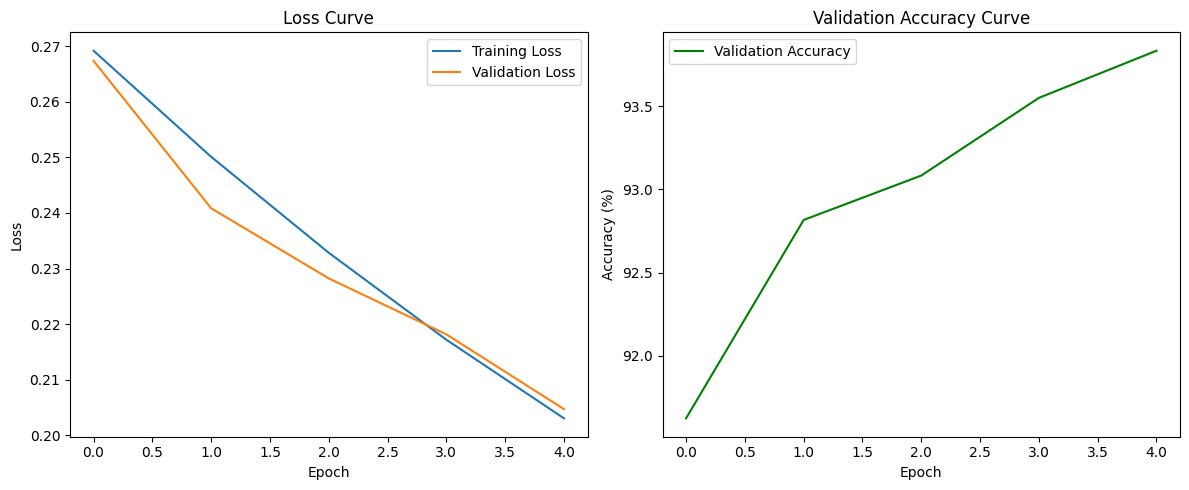

In [18]:
# Plot training loss and validation loss
plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.plot(val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy Curve')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()